## Step 1 : Reading And Understanding the Data

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score

In [2]:
# Loading the Data Set(for linear regression)
boom=pd.read_csv('day.csv')

In [3]:
#Reading the data 
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Assessing the columns of boom bike data
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


__Observation__:
<font color = 'Green'>
- Here we can observe that there is no null values. 
- All the columns datatypes are proper as per the details of records.


In [5]:
#Statistics information of boom  data set 
boom.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
boom['holiday'].value_counts(normalize=True)*100

0    97.123288
1     2.876712
Name: holiday, dtype: float64

__Observations__:<br>
<font color ='DarkBlue'>
People using boom bike are 97% are on working day. There are only 2.8% people used it on holidays

In [7]:
boom['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

__Observations__:<br>
<font color = 'Green'>
We can assume weekdays as follow:<br>
<font color ='DarkBlue'>
  0 - Sunday
  1 - Monday
  2 - Tuesday
  3 - Wedday
  4 - Thursday
  5 - Friday
  6 - Saturday


In [8]:
#weathersit configuration 
boom['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

__Observtions__:<br>
<font color ='DarkBlue'>
- weathersit has 3 levels 1,2 and 3. As per the disctionary it has following different weather situations:
<font color = 'Green'> <br>
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>

## Dropping the Columns<br>
<font color ='DarkBlue'><br>
Below coulmns can be dropped:<br>
<font color = 'Green'>
instant - It is a unique variable <br>
dteday - It is abvailable in the form of weekday, month , year columns<br>
atemp - temp kind off similar way that if atemp.they wil be highly correlated. keeping temp.<br>
casual and registered: These are target variables. I can have only one target variable. Want to predict Total demand.
So kepeing count variable<br>

In [9]:
boom=boom.drop(['instant','dteday','atemp','casual','registered'],axis=1)

In [10]:
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


## Converting Categorical data into Category


Following Columns have integer value which needs to get converted to Category Value:<br>
<font color ='Black'>
    
--> season 
<font color ='DarkBlue'>
   * 1:spring<br>
   * 2:summer<br>
   * 3:fall<br>
   * 4:winter<br>
<font color ='Black'>
--> mnth  <br>
<font color ='DarkBlue'>
   * (1-Jan, 2-Feb, 3-Mar,........., 12-Dec)<br>
<font color ='Black'>
--> weekday <br>
<font color ='DarkBlue'>
   * (1-Mon, 2-Tue, 3-Wed, 4-Thu, 5-Fri, 6-Sat, 0-Sun)<br>
<font color ='Black'>
--> weathersit<br>
<font color ='DarkBlue'>
  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy [CLEAR]<br>
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist [Mist and Cloudy]<br>
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds[Light Snow Rain]<br>
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog[Heavy Snow Rain]

In [11]:
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


####  <font color = Blue> __SEASON__

In [12]:
boom['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
seasons=['spring','summer','fall','winter']
for i in range(len(seasons)):
    boom['season']=boom['season'].apply(lambda x : seasons[i] if x==i+1 else x)

In [14]:
boom['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


####  <font color = Blue> __MNTH__

In [16]:
boom.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [17]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(len(months)):
    boom['mnth']=boom['mnth'].apply(lambda x : months[i] if x==i+1 else x)
    

In [18]:
boom.mnth.value_counts()

Jan    62
Mar    62
Dec    62
May    62
Aug    62
Oct    62
Jul    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [19]:
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,1,9.305237,43.6957,12.522300,1600


####  <font color = Blue> __WEEKDAY__

In [20]:
boom['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [21]:
weekdays=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
for i in range(len(weekdays)):
    boom['weekday']=boom['weekday'].apply(lambda x : weekdays[i] if x==i else x)

In [22]:
boom['weekday'].value_counts()

Sun    105
Mon    105
Sat    105
Fri    104
Thu    104
Tue    104
Wed    103
Name: weekday, dtype: int64

####  <font color = Blue> __WEATHERSIT__

In [23]:
boom['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [24]:
weather_situation=['Clear','Mist and Cloudy','Light Snow rain','Heavy Snow Rain']
for i in range(len(weather_situation)):
    boom['weathersit']=boom['weathersit'].apply(lambda x : weather_situation[i] if x==i+1 else x)

In [25]:
boom['weathersit'].value_counts()

Clear              463
Mist and Cloudy    246
Light Snow rain     21
Name: weathersit, dtype: int64

In [26]:
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist and Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist and Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


##  Visualisation The Data

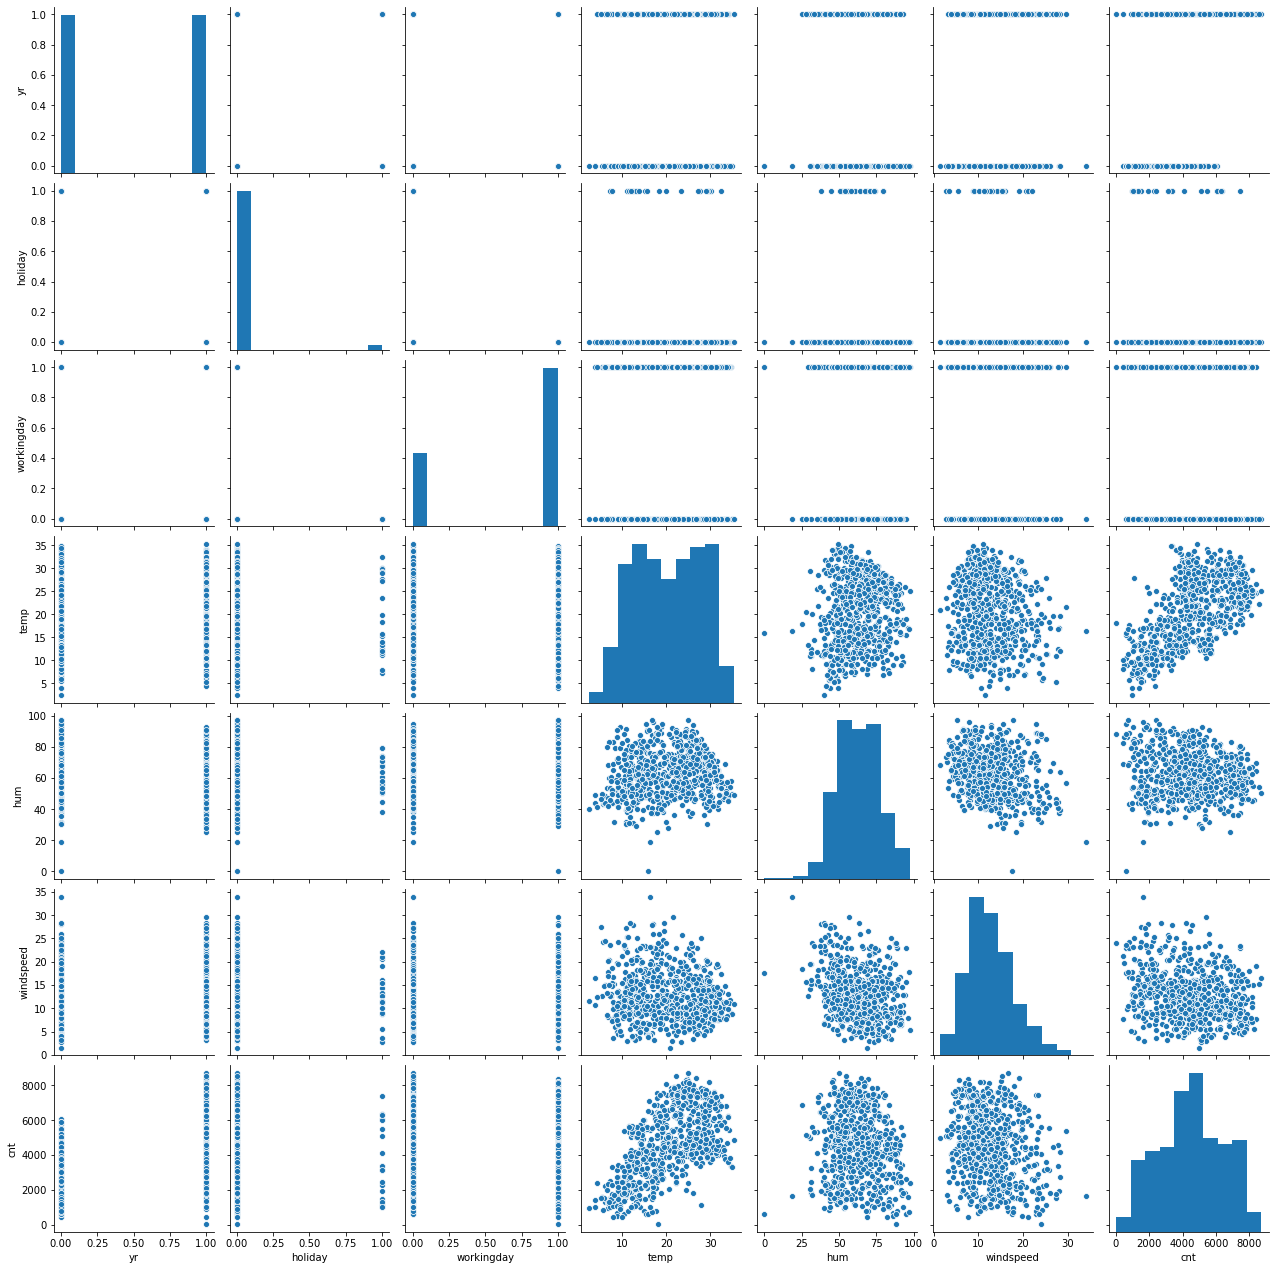

In [27]:
sns.pairplot(boom)
plt.show()

__Observation__:
<font color ='Blue'>
- Here we have count,windspeed,hum,temp,workingday,holida,yr as numeric columns. <br>
- we can last column which shows relationship between cnt with other independent variable.<br>
- we can see the pairplot of cnt and temp made some sort of positive correlation which means that some of the variance in cnt is explained by temp but not all of them as we are not seeing sort of  nice straight line.<br>
- It can also be observed that as for humidity and windspeed , it is andomly scatter and hence cant explain most of the variance in cnt <br>

## Visualisation of Categorical Variables

In [28]:
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist and Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist and Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [29]:
categorical_variable=['season','mnth','weekday','weathersit']

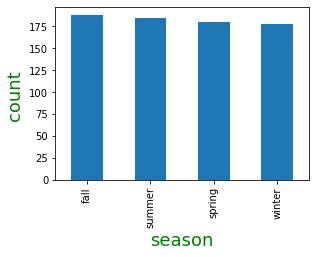

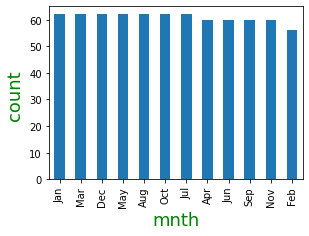

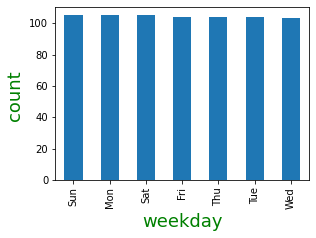

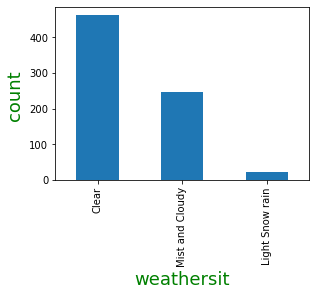

In [30]:
for i in range(len(categorical_variable)):
    plt.figure(figsize=[10,7])
    plt.subplot(2,2,i+1)    
    boom[categorical_variable[i]].value_counts().plot(kind='bar')
    plt.xlabel(categorical_variable[i],fontsize=18,color='Green')
    plt.ylabel('count ',fontsize=18,color='Green')
    plt.show()

__Obseravtion__:
<font color = 'DarkBlue'>
- It can be observed with the count we cannot identify much but can be seen that the least  preferred of bikes is during Light Snow Rain.<br>
- The least usage in Feb month 

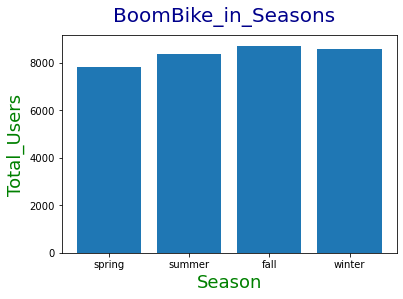

In [31]:
fig=plt.figure()
plt.bar(boom['season'],boom['cnt'])
fig.suptitle('BoomBike_in_Seasons',fontsize=20,color='DarkBlue')
plt.xlabel('Season',fontsize=18,color='Green')
plt.ylabel('Total_Users',fontsize=18,color='Green')
plt.show()


__Observations__:
<font color ='DarkBlue'>
- Here it can be observed that The most usage is in Autum.
- In Winter Also there were preferaably demand for boom bikes.
- People preferred boom bike less in Spring.

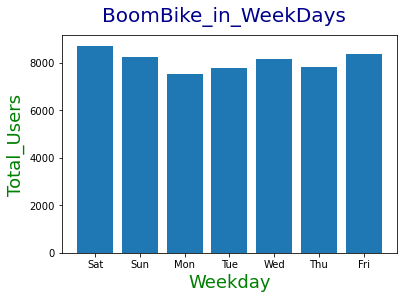

In [32]:
fig=plt.figure()
plt.bar(boom['weekday'],boom['cnt'])
fig.suptitle('BoomBike_in_WeekDays',fontsize=20,color='DarkBlue')
plt.xlabel('Weekday',fontsize=18,color='Green')
plt.ylabel('Total_Users',fontsize=18,color='Green')
plt.show()

__Observations__:
<font color = 'DarkBlue'>
- The Most Usage is on weekend that is on saturday.
- Among Weekdays, Wednesday and Friday, people preferred or used boom bikes

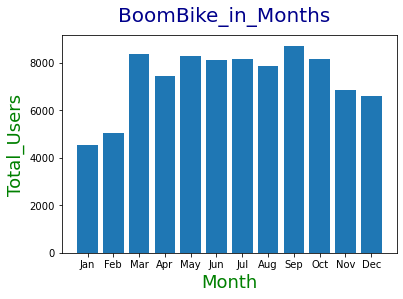

In [33]:
fig=plt.figure()
plt.bar(boom['mnth'],boom['cnt'])
fig.suptitle('BoomBike_in_Months',fontsize=20,color='DarkBlue')
plt.xlabel('Month',fontsize=18,color='Green')
plt.ylabel('Total_Users',fontsize=18,color='Green')
plt.show()

__Observations__:
<font color = 'DarkBlue'>
- It can be observed that the most usage is happened in month of september. <br>
- Also in Jan and Feb months least boom bikes are preferred by people.<br>
- Comparatively March and October are the months where usage of them is more.

In [34]:
boom_bike=pd.read_csv('day.csv')

In [35]:
boom_bike['yr']=boom_bike['yr'].apply(lambda x: '2011' if x==0 else '2012')

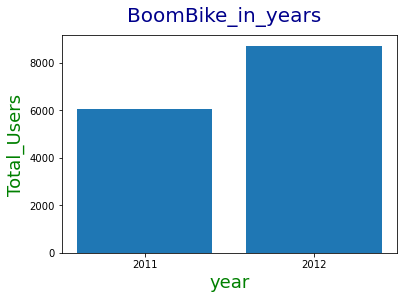

In [36]:

fig=plt.figure()
plt.bar(boom_bike['yr'],boom_bike['cnt'])
fig.suptitle('BoomBike_in_years',fontsize=20,color='DarkBlue')
plt.xlabel('year',fontsize=18,color='Green')
plt.ylabel('Total_Users',fontsize=18,color='Green')
plt.show()

__Observations__:
<font color = 'DarkBlue'>
- It can be observed that as in coming years , the demand of boom bikes has signigicantly increased.<br>

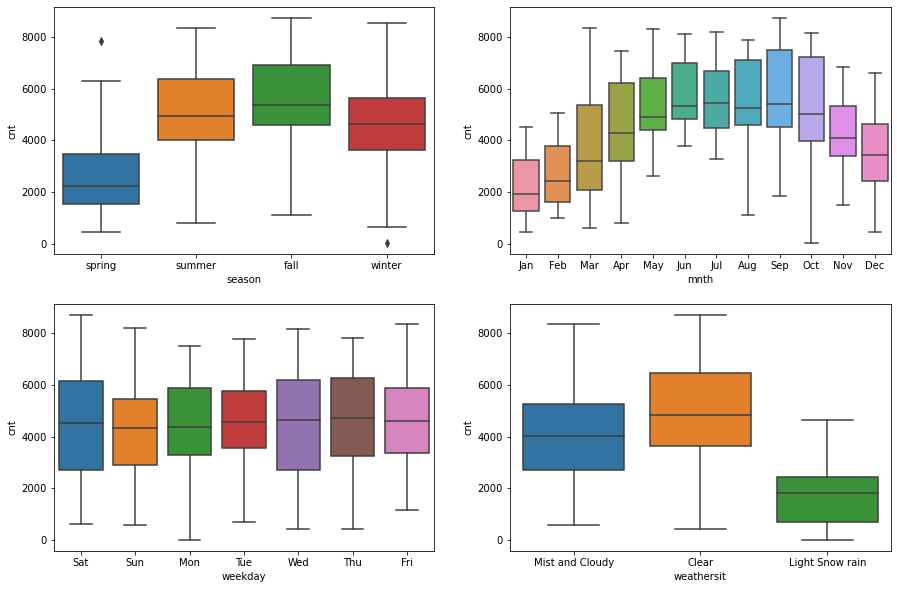

In [37]:
plt.figure(figsize=[15,10])
for i in range(len(categorical_variable)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=categorical_variable[i],y='cnt',data=boom)

__Observation__:
<font color = 'DarkBlue'>
- we can observe that from the graph that fall that is autumn season has more 50th percentile of count among all season however distribution looks same.
- Sep month has more distribution as compared to other months. Jan month has the lowest median.
- Coming to median as there is not much difference in the median of all days. The range in which count is more is for Sat and Wed
- It can be observed that During Light Snow Rain Situation, Prefeered for bike is really low. During Clear Weather , it is preferred more. 

 ## Step2: Data Preparation  for Modelling

In [38]:
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist and Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist and Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


## Creating Dummy Variables

In [39]:
#creating dummy variables for below list
varlist=['season','mnth','weekday','weathersit']


In [40]:
#Creating status dataframe in which dummy variables of varlist would be there
status=pd.get_dummies(boom[varlist])
status

,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light Snow rain,weathersit_Mist and Cloudy
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
726,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
727,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
728,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


__Note__:
<font color ='DarkBlue'>
We dont need all level for each category columns.As the level can be identified with just N-1.
So dropping the redundant dummy variable

In [41]:
#Dropping the First variable
status=pd.get_dummies(boom[varlist],drop_first=True)
status

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow rain,weathersit_Mist and Cloudy
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [42]:
#Concate the dummy dataframe with the original one
boom=pd.concat([boom,status],axis=1)
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow rain,weathersit_Mist and Cloudy
0,spring,0,Jan,0,Sat,0,Mist and Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist and Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
#dropping the columns varlist=['season','mnth','weekday','weathersit']
boom=boom.drop(varlist,axis=1)
boom.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow rain,weathersit_Mist and Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [44]:
#Size of Data Set
boom.shape

(730, 29)

## Splitting Data into Train and Test set

In [45]:
#Dividing data into 75-25 
df_train,df_test=train_test_split(boom,train_size=0.75,random_state=100)
print(df_train.shape)
print(df_test.shape)

(547, 29)
(183, 29)


## Rescaling the feature

In [46]:
#Instantiate Object
# Scaling the temp, hum,windspeed using Min-Max Scaler
scaler=MinMaxScaler()
num_vars=['temp','hum','windspeed']

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow rain,weathersit_Mist and Cloudy
311,0,0,1,0.435124,0.743667,0.057471,4205,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
523,1,0,1,0.735215,0.482181,0.286093,7736,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
381,1,0,1,0.391151,0.737917,0.659615,2935,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
413,1,0,0,0.358285,0.550880,0.319514,4318,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
253,0,0,0,0.740406,0.735509,0.156398,5046,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


## Step3: Training the Model

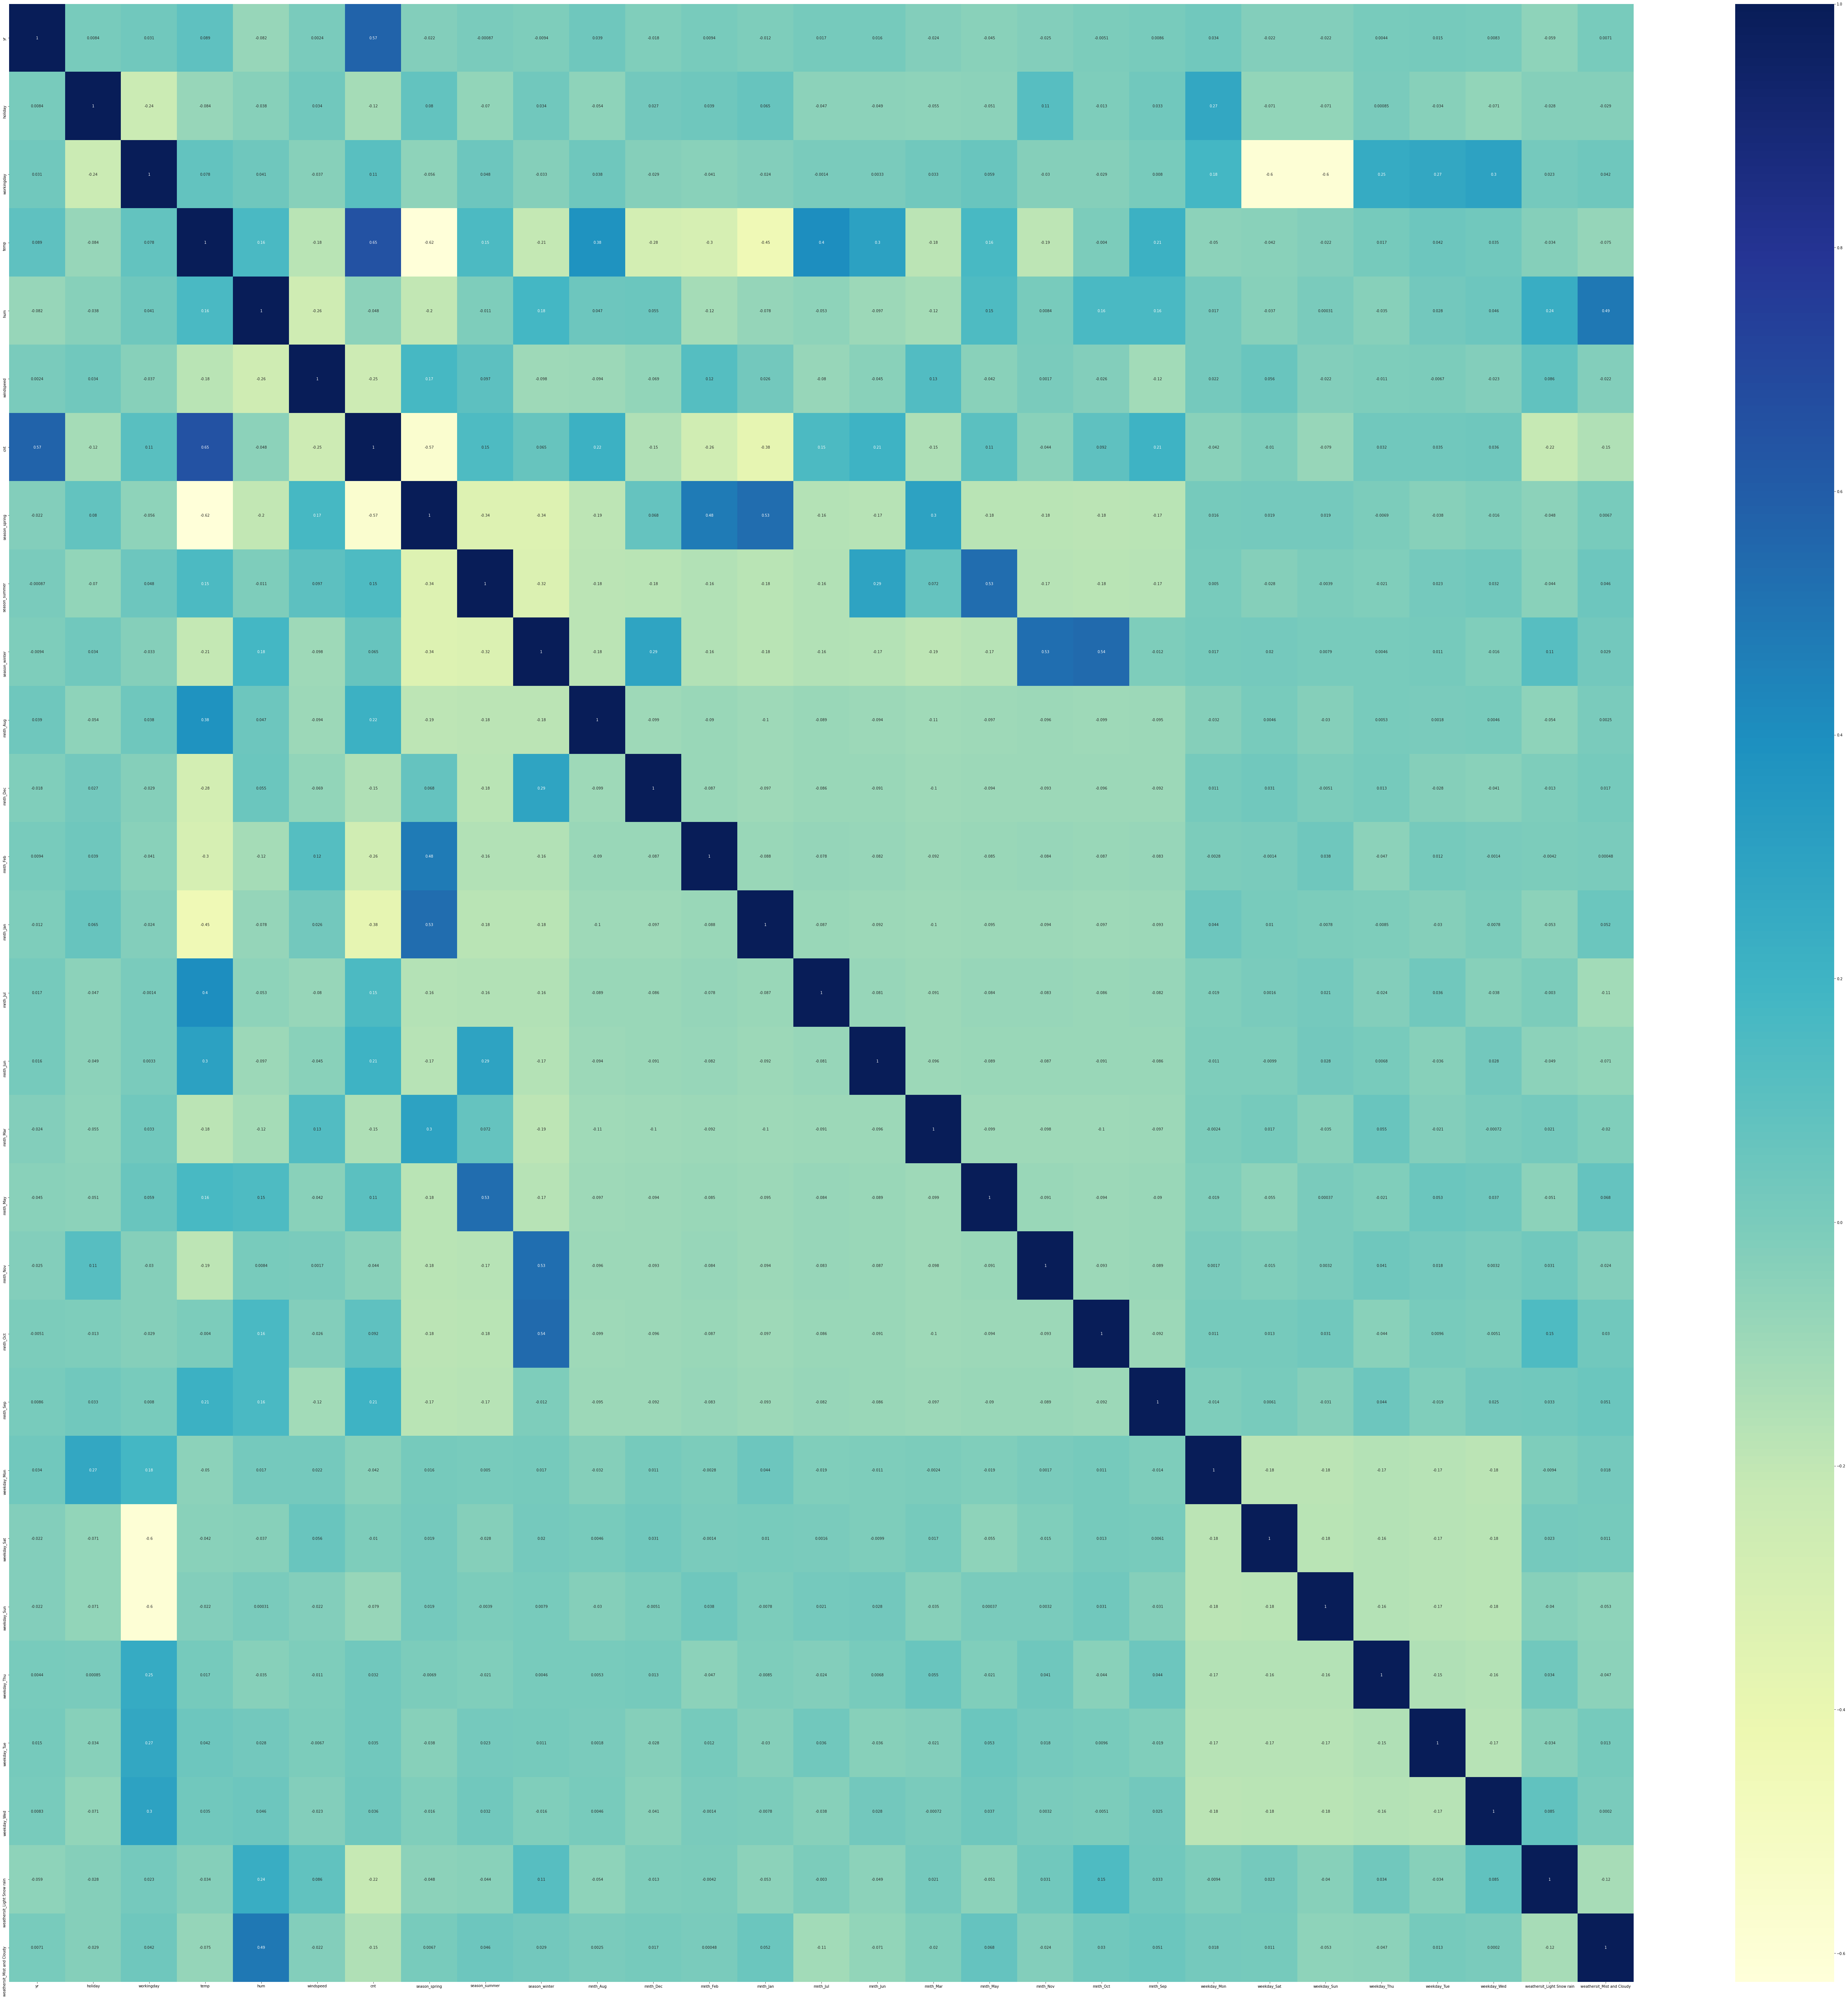

In [47]:
#heatmap for all the variables present in train data set 
plt.figure(figsize=(100,100))
sns.heatmap(df_train.corr(),cmap='YlGnBu',annot=True)

__Observations__:
<font color = 'DarkBlue'>
- It can be observed that There are few variables which has correlations.<br>
- To get quantitatively, we will directly verify from corr() function.

In [48]:
#Correlation of Train Data Set
df_train.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow rain,weathersit_Mist and Cloudy
yr,1.000000,0.008433,0.031001,0.088690,-0.081833,0.002390,0.573177,-0.022238,-0.000870,-0.009373,0.038741,-0.018028,0.009424,-0.011564,0.016757,0.015575,-0.023933,-0.044515,-0.024890,-0.005104,0.008579,0.033562,-0.022249,-0.022249,0.004410,0.014874,0.008329,-0.058742,0.007124
holiday,0.008433,1.000000,-0.238776,-0.084239,-0.038456,0.033720,-0.118934,0.080193,-0.069617,0.034499,-0.053844,0.027052,0.038832,0.064925,-0.046525,-0.049047,-0.055000,-0.050880,0.112688,-0.012513,0.032657,0.270024,-0.071018,-0.071018,0.000847,-0.033687,-0.071018,-0.028195,-0.029063
workingday,0.031001,-0.238776,1.000000,0.077518,0.041109,-0.037159,0.109079,-0.056348,0.048242,-0.033064,0.038426,-0.029071,-0.041251,-0.024300,-0.001435,0.003299,0.033328,0.059094,-0.029831,-0.029071,0.007992,0.180994,-0.601425,-0.601425,0.250806,0.266794,0.297426,0.022921,0.042390
temp,0.088690,-0.084239,0.077518,1.000000,0.161772,-0.178178,0.648869,-0.623434,0.151235,-0.206407,0.384417,-0.280471,-0.298081,-0.445547,0.401361,0.304215,-0.179820,0.164544,-0.186601,-0.003994,0.214239,-0.049901,-0.041791,-0.021531,0.016508,0.042465,0.035284,-0.033593,-0.074894
hum,-0.081833,-0.038456,0.041109,0.161772,1.000000,-0.260246,-0.047979,-0.204553,-0.011131,0.176035,0.046930,0.054756,-0.116923,-0.077779,-0.052910,-0.097003,-0.119582,0.145250,0.008391,0.161592,0.157870,0.017490,-0.036725,0.000313,-0.034701,0.027654,0.045785,0.238231,0.490430
windspeed,0.002390,0.033720,-0.037159,-0.178178,-0.260246,1.000000,-0.247968,0.172898,0.097268,-0.098239,-0.094210,-0.069160,0.123834,0.026094,-0.080195,-0.044525,0.134899,-0.042328,0.001720,-0.025924,-0.115062,0.022295,0.055756,-0.022370,-0.010876,-0.006656,-0.023273,0.085535,-0.022289
cnt,0.573177,-0.118934,0.109079,0.648869,-0.047979,-0.247968,1.000000,-0.567066,0.146895,0.065160,0.218240,-0.152277,-0.264816,-0.381270,0.154424,0.206297,-0.145005,0.105387,-0.043744,0.092069,0.207293,-0.041669,-0.009970,-0.078953,0.032370,0.035236,0.036405,-0.216487,-0.153314
season_spring,-0.022238,0.080193,-0.056348,-0.623434,-0.204553,0.172898,-0.567066,1.000000,-0.335679,-0.335679,-0.188969,0.068352,0.476628,0.532276,-0.163285,-0.172134,0.301489,-0.178569,-0.176442,-0.182775,-0.174297,0.015619,0.018699,0.018699,-0.006916,-0.037576,-0.016250,-0.047770,0.006716
season_summer,-0.000870,-0.069617,0.048242,0.151235,-0.011131,0.097268,0.146895,-0.335679,1.000000,-0.324455,-0.182651,-0.176664,-0.159994,-0.178674,-0.157826,0.291667,0.072087,0.531965,-0.170542,-0.176664,-0.168469,0.004979,-0.027639,-0.003942,-0.020595,0.023266,0.031603,-0.043588,0.046460
season_winter,-0.009373,0.034499,-0.033064,-0.206407,0.176035,-0.098239,0.065160,-0.335679,-0.324455,1.000000,-0.182651,0.289084,-0.159994,-0.178674,-0.157826,-0.166378,-0.186574,-0.172599,0.525626,0.544494,-0.012172,0.016770,0.019755,0.007906,0.004551,0.010838,-0.015791,0.112586,0.028626


__Observations__:
<font color = 'DarkBlue'>
- It can be seen traget variable '__cnt__' is highly correlated with the temp variable.<br>
- Also With "__Spring_Season__", it is highly negatively correlated.

## ## Trainig Model - RFE


In [49]:
#Reading Columns
boom.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Light Snow rain',
       'weathersit_Mist and Cloudy'],
      dtype='object')

In [50]:
#build a modle with all variables
#X_train,y_train
y_train=df_train.pop('cnt')
X_train=df_train

In [51]:
#Running RFE wih the output number of the variables equal to 10
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,15)           #running RFE
rfe=rfe.fit(X_train,y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 13),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 10),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 8),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 5),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 6),
 ('weekday_Wed', False, 12),
 ('weathersit_Light Snow rain', True, 1),
 ('weathersit_Mist and Cloudy', True, 1)]

__Observations__:

- Below are the columns which has been ranked as not significant for the model:<br>
<font color = 'DarkBlue'>
- 'mnth_Nov', False, 2 <br>
- 'mnth_Dec', False, 3<br>
- 'mnth_Jan', False, 4<br>
- 'mnth_Feb', False, 5<br>
- 'weekday_Mon', False, 6<br>
- 'weekday_Tue', False, 7<br>
- 'mnth_May', False, 8<br>
- 'mnth_Aug', False, 9<br>
- 'weekday_Thu', False, 11<br>
- 'mnth_Jun', False, 10<br>
- 'weekday_Wed', False, 12<br>
- 'mnth_Oct', False, 13<br>
- 'mnth_Mar', False, 14<br>



__Observations__:

- Below are the columns which has been supportive and  significant for the model:<br>
<font color = 'DarkBlue'>
- 'yr', True, 1
- 'holiday', True, 1
- 'workingday', True, 1
- 'temp', True, 1
- 'hum', True, 1
- 'windspeed', True, 1
- 'season_spring', True, 1
- 'season_summer', True, 1
- 'season_winter', True, 1
- 'mnth_Jul', True, 1
- 'mnth_Sep', True, 1
- 'weekday_Sat', True, 1
- 'weekday_Sun', True, 1
- 'weathersit_Light Snow rain', True, 1
- 'weathersit_Mist and Cloudy', True, 1

In [53]:
#Taking the columns which are significant in col dataframe
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Light Snow rain',
       'weathersit_Mist and Cloudy'],
      dtype='object')

In [54]:
#Columns which is insignificant
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

## Building Model using statsmodel for the detailed  statistics

## Model 1

In [55]:
#Creating X_train dataframes with RFE selected variables
X_train_rfe=X_train[col]

In [56]:
#add constant
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe)
lm_model=lm.fit()
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.32e-206
Time:                        23:28:13   Log-Likelihood:                -4407.0
No. Observations:                 547   AIC:                             8844.
Df Residuals:                     532   BIC:                             8908.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [57]:
vif=pd.DataFrame()
X=X_train_rfe

vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
12,weekday_Sat,inf
13,weekday_Sun,inf
4,temp,3.05
7,season_spring,2.69
8,season_winter,2.05
5,hum,1.90
15,weathersit_Mist and Cloudy,1.58
10,mnth_Nov,1.45


__Observations__:<br>

<font color = 'DarkBlue'>
- Year , workingday , temp , season_summer, season_winter , mnth_ Sep , weekday_Sun, weekday_Sat are having coefficient positive.<br>
- The variables are significant except variable 'holiday' which is having p-value.<br>
- R-Squared is 84.7%<br>
- Adjusted R- Squared is 84.3%<br>
-An infinite VIF value indicates that the corresponding variable['holiday','weekday_Sun','Weekday_Sat','Workingday'] may be expressed exactly by a linear combination of other variables<br>
- So we wil drop the __holiday__ parameter and rebuild model.<br>

## Model 2

In [58]:
X_train_2=X_train_rfe.drop(['holiday'],axis=1)

In [59]:
X_train_2=sm.add_constant(X_train_2)
lm=sm.OLS(y_train,X_train_2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.32e-206
Time:                        23:28:13   Log-Likelihood:                -4407.0
No. Observations:                 547   AIC:                             8844.
Df Residuals:                     532   BIC:                             8908.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [60]:
X_train_2.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Light Snow rain',
       'weathersit_Mist and Cloudy'],
      dtype='object')

In [61]:
vif=pd.DataFrame()
X=X_train_2

vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,100.57
2,workingday,8.67
11,weekday_Sat,5.69
12,weekday_Sun,5.68
3,temp,3.05
6,season_spring,2.69
7,season_winter,2.05
4,hum,1.90
14,weathersit_Mist and Cloudy,1.58
9,mnth_Nov,1.45


__Observations__:
<font color = 'DarkBlue'>
- The variables are significant.<br>
- R-Squared is 84.7%<br>
- Adjusted R- Squared is 84.3%<br>
- VIF value is high for workingday,weekday_Sun, weekday_Sat<br>
- Since mnth_Nov has high p- value comparatively.
- So we wil drop the __mnth_Nov parameter and rebuild model.<br>

## Model 3

In [62]:
X_train_3=X_train_2.drop(['mnth_Nov'],axis=1)

In [63]:
X_train_3=sm.add_constant(X_train_3)
lm=sm.OLS(y_train,X_train_3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     225.8
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          5.32e-207
Time:                        23:28:13   Log-Likelihood:                -4408.8
No. Observations:                 547   AIC:                             8846.
Df Residuals:                     533   BIC:                             8906.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [64]:
vif=pd.DataFrame()
X=X_train_3

vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,98.12
2,workingday,8.57
11,weekday_Sun,5.62
10,weekday_Sat,5.61
3,temp,3.00
6,season_spring,2.65
4,hum,1.90
7,season_winter,1.76
13,weathersit_Mist and Cloudy,1.58
8,mnth_Jul,1.28


__Observations__:
<font color = 'DarkBlue'>
- The variables are significant.<br>
- R-Squared is 84.6%<br>
- Adjusted R- Squared is 84.3%<br>
- VIF value is high for workingday<br>
- Since p-value is high comparatively for weekday_Sun.<br>
- So we wil drop the '__Weekday_Sun__' parameter and rebuild model.<br>

## Model 4

In [65]:
X_train_4=X_train_3.drop(['weekday_Sun'],axis=1)

In [66]:
X_train_4=sm.add_constant(X_train_4)
lm=sm.OLS(y_train,X_train_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     240.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.34e-206
Time:                        23:28:13   Log-Likelihood:                -4413.6
No. Observations:                 547   AIC:                             8853.
Df Residuals:                     534   BIC:                             8909.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [67]:
vif=pd.DataFrame()
X=X_train_4

vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,66.21
3,temp,3.00
6,season_spring,2.64
4,hum,1.90
7,season_winter,1.75
2,workingday,1.59
10,weekday_Sat,1.58
12,weathersit_Mist and Cloudy,1.58
8,mnth_Jul,1.28
11,weathersit_Light Snow rain,1.23


__Observations__:
<font color = 'DarkBlue'>
- The variables are significant.<br>
- R-Squared is 84.4%<br>
- Adjusted R- Squared is 84%<br>
- VIF value is more than 2 for season_spring and temp.<br>
- Comparitively month july has negative coeff which tells there is low demand for bike.<br>
- So we wil drop the '__mnth_Jul__' parameter and rebuild model.<br>

## Model 5

In [68]:
X_train_5=X_train_4.drop(['mnth_Jul'],axis=1)

In [69]:
X_train_5=sm.add_constant(X_train_5)
lm=sm.OLS(y_train,X_train_5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     250.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.11e-202
Time:                        23:28:13   Log-Likelihood:                -4424.8
No. Observations:                 547   AIC:                             8874.
Df Residuals:                     535   BIC:                             8925.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [70]:
vif=pd.DataFrame()
X=X_train_5

vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,66.11
3,temp,2.64
6,season_spring,2.62
4,hum,1.88
7,season_winter,1.75
2,workingday,1.59
9,weekday_Sat,1.58
11,weathersit_Mist and Cloudy,1.58
10,weathersit_Light Snow rain,1.23
5,windspeed,1.16


__Observations__:
<font color = 'DarkBlue'>
- The variables are significant.<br>
- R-Squared is 83.7%<br>
- Adjusted R- Squared is 83.4%<br>
- VIF value is more than 2 for season_spring and temp.<br>
- Here can be intuitive by seeing coefficient of humidity that if more humidity , the demand willgo down.<br>
- So we wil drop the '__hum__' parameter and rebuild model.<br>

## Model 6

In [71]:
X_train_6=X_train_5.drop(['hum'],axis=1)

In [72]:
X_train_6=sm.add_constant(X_train_6)
lm=sm.OLS(y_train,X_train_6).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     267.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.21e-201
Time:                        23:28:13   Log-Likelihood:                -4431.4
No. Observations:                 547   AIC:                             8885.
Df Residuals:                     536   BIC:                             8932.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [73]:
vif=pd.DataFrame()
X=X_train_6

vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,37.57
5,season_spring,2.62
3,temp,2.53
6,season_winter,1.69
2,workingday,1.59
8,weekday_Sat,1.58
4,windspeed,1.07
7,mnth_Sep,1.07
9,weathersit_Light Snow rain,1.05
10,weathersit_Mist and Cloudy,1.04


__Observations__:
<font color = 'DarkBlue'>
- The variables are significant.<br>
- R-Squared is 83.3%<br>
- Adjusted R- Squared is 83%<br>
- VIF value is more than 2 for season_spring and temp.<br>

## Model 7

In [74]:
X_train_7=X_train_6.drop(['windspeed'],axis=1)

In [75]:
X_train_7=sm.add_constant(X_train_7)
lm=sm.OLS(y_train,X_train_7).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     278.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.02e-195
Time:                        23:28:14   Log-Likelihood:                -4447.0
No. Observations:                 547   AIC:                             8914.
Df Residuals:                     537   BIC:                             8957.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [76]:
vif=pd.DataFrame()
X=X_train_7

vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,31.21
4,season_spring,2.62
3,temp,2.49
5,season_winter,1.67
2,workingday,1.59
7,weekday_Sat,1.58
6,mnth_Sep,1.06
8,weathersit_Light Snow rain,1.04
9,weathersit_Mist and Cloudy,1.04
1,yr,1.02


__Observations__:
<font color = 'DarkBlue'>
- The variables are significant.<br>
- R-Squared is 82.3%<br>
- Adjusted R- Squared is 82%<br>
- VIF value is more than 2 for season_spring and temp.<br>

## Step 4: Residual Analysis

In [77]:
#predicting the y on train set
y_train_pred=lm.predict(X_train_7)

In [78]:
#Evaluating the Error term or Residual
res=y_train-y_train_pred

<Figure size 1440x1440 with 0 Axes>

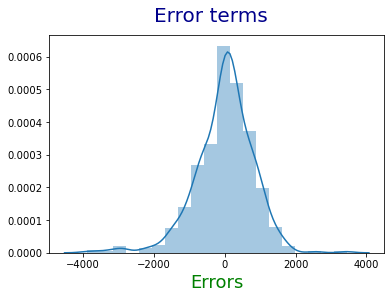

In [79]:
#Plotting the Distribution graph for Residual
plt.figure(figsize=[20,20])
fig=plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error terms',fontsize=20,color='DarkBlue')
plt.xlabel('Errors',fontsize=18,color='Green')
plt.show()

__Observations__:
<font color ='DarkBlue'>
- The errors are normally Distributed 
- The mean is equal to zero
- They indicate they are independent from each other

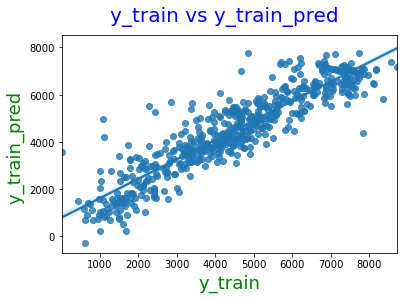

In [80]:
#Plotting y_train and y_train_pred to understand the spread
fig=plt.figure()
sns.regplot(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred',fontsize=20,color='Blue')
plt.xlabel('y_train',fontsize=18,color='Green')
plt.ylabel('y_train_pred ',fontsize=18,color='Green')
plt.show()

__Observations__:
<font color ='DarkBlue'>
- It can be observed  the model is able to predict the y- variable.
- The Y- prediction is correlating with y_train set.

## Step 5:Prediction and Evaluation Test


In [81]:
#Applying scaling on test set 
num_vars=['temp','hum','windspeed']

df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow rain,weathersit_Mist and Cloudy
184,0,1,0,0.831783,0.657364,0.084219,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [82]:
#Reading the df_test
df_test.shape

(183, 29)

In [83]:
#Statistical information of test data set of boom bikes
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow rain,weathersit_Mist and Cloudy
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.475410,0.032787,0.726776,0.568688,0.635166,0.316439,4630.786885,0.213115,0.273224,0.240437,0.060109,0.076503,0.087432,0.071038,0.125683,0.092896,0.049180,0.087432,0.081967,0.076503,0.087432,0.114754,0.120219,0.120219,0.174863,0.163934,0.109290,0.032787,0.300546
std,0.500765,0.178567,0.446837,0.234887,0.152926,0.159371,1875.584487,0.410632,0.446837,0.428521,0.238341,0.266530,0.283242,0.257593,0.332401,0.291083,0.216838,0.283242,0.275067,0.266530,0.283242,0.319599,0.326109,0.326109,0.380892,0.371232,0.312858,0.178567,0.459754
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.362754,0.522601,0.199183,3440.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.575304,0.618721,0.303464,4656.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.774153,0.735079,0.404383,5942.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations: The max value is not 1. The max value of training set is 1 because we fit the scaler on training set, the min max vales the min max scaler is using corresponding to train set and we tranformed the test set using those min max values .

In [90]:
#Divide into X_test and y_test
y_test=df_test.pop('cnt')
X_test=df_test

In [85]:
#Creating X_test_new datframe by dropping variables  from X_test
X_test_new=X_train_7.copy()
X_test_new=X_test_new.drop('const',axis=1)
X_test_new=X_test[X_test_new.columns]

In [86]:
X_test_new

,yr,workingday,temp,season_spring,season_winter,mnth_Sep,weekday_Sat,weathersit_Light Snow rain,weathersit_Mist and Cloudy
184,0,0,0.831783,0,0,0,0,0,1
535,1,1,0.901354,0,0,0,0,0,0
299,0,1,0.511964,0,1,0,0,0,1
221,0,1,0.881625,0,0,0,0,0,0
152,0,1,0.817246,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
99,0,0,0.457969,0,0,0,0,0,1
515,1,1,0.773634,0,0,0,0,0,0
225,0,0,0.769481,0,0,0,0,0,1
195,0,1,0.752866,0,0,0,0,0,0


In [87]:
#Adding the constant
X_test_new=sm.add_constant(X_test_new)

In [88]:
#making prediction
y_test_pred=lm.predict(X_test_new)

# Model Evaluation

In [91]:
#Evaluating the Error term or Residual
res=y_test-y_test_pred

<Figure size 1440x1440 with 0 Axes>

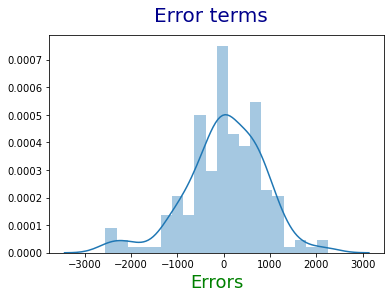

In [92]:
#Plotting the Graph of Residual b
plt.figure(figsize=[20,20])
fig=plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error terms',fontsize=20,color='DarkBlue')
plt.xlabel('Errors',fontsize=18,color='Green')
plt.show()

__Observations__:
<font color ='DarkBlue'>
- Here also can be observed that error terms are normally distributed and mean is about ot zero

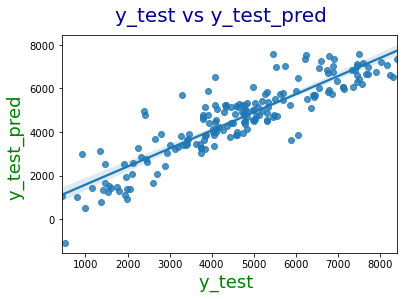

In [93]:
#Plotting y_test and y_pred to understand the spread
fig=plt.figure()
sns.regplot(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred ',fontsize=20,color='DarkBlue')
plt.xlabel('y_test ',fontsize=18,color='Green')
plt.ylabel('y_test_pred ',fontsize=18,color='Green')

plt.show()

__Observations__:
<font color ='DarkBlue'>
- It can be observed that Model is bale to genralise on test data set
- The graph is similar to the obtained with Train data set 
- It can be observed that predicton of y test data set is correlating with test data set 


In [94]:
#Evaluate the model
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8003651759659672

__Observations__:
<font color ='DarkBlue'>
- It can be seen from R2 Score obtained is 80%
- The Value is quietly close enough to the value of R2 obtained in final model with train data set that is 82.3%


## Model Formulation and Important Variables
__The model we obtained is as below:<br>
cnt =
<font color='Green'>
1384.7455 + 22016.776(yr) + 508.3687(workingday) + 3798.7084(temp) - 1045.6441(season_spring)<br> + 521.2541(season_winter) + 601.824(mnth_Sep) + 554.8478(weekday_Sat) - 2675.0708(weathersit_Light_Snow_Rain) - 672.2121(weathersit_Mist_and_Cloudy)
 <br>  
<font color='Black'>
Important Variable and parameters on which Demand is dpendent__<br>
<font color='DarkBlue'>
    <br>
**YEAR**: (It was observed as in upcoming years, the demand willbe raising ).<br>
    <br>
**Working Day**: (It was observed that the demand is high on working days, Means to commute people preferred boom bikes than their own vehicle).<br>
    <br>
**TEMPERATURE**: (It is observed that temperature has high weightage. As seen inthe data thoruh plots they are correlated and with increase in temoerature ,demand also increases.)<br>
    <br>
**Weekend Saturday**: (Weekends demands especially saturday seems very high)<br>
    <br>
**Month September**:(September , autumn season , demand rises fro boom bikes)<br>
    
    